In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline, FeatureUnion

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [5]:
df[df['artists'].isna()]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [6]:
df.dropna(inplace=True)

In [7]:
df['track_id'].value_counts()

6S3JlDAGk3uu3NtZbPnuhS    9
2kkvB3RNRzwjFdGhaUA0tz    8
2Ey6v4Sekh3Z0RUSISRosD    8
4GPQDyw9hC1DiZVh0ouDVL    7
2aaClnypAakdAmLw74JXxB    7
                         ..
39oaNtdAIOrkUIaVqCz2Z5    1
4s1dze8ccQiV3hdayWahkB    1
5penl87Jj0gd1jpMnG9cm9    1
2avaSeKHI5l4sLruVfLdi2    1
4umiLE5Jq1dLTX5GmBCQBH    1
Name: track_id, Length: 89740, dtype: int64

In [8]:
df.drop_duplicates(subset=['track_id'], inplace=True)

In [9]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,89740.000000,89740.000000,8.974000e+04,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000
mean,53479.005739,33.198808,2.291444e+05,0.562166,0.634458,5.283530,-8.498994,0.636973,0.087442,0.328285,0.173415,0.216971,0.469474,122.058134,3.897426
std,33410.141924,20.580640,1.129458e+05,0.176692,0.256606,3.559912,5.221518,0.480875,0.113278,0.338321,0.323849,0.194885,0.262864,30.117651,0.453437
min,0.000000,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23766.750000,19.000000,1.730400e+05,0.450000,0.457000,2.000000,-10.322250,0.000000,0.036000,0.017100,0.000000,0.098200,0.249000,99.262750,4.000000
50%,50680.500000,33.000000,2.132955e+05,0.576000,0.676000,5.000000,-7.185000,1.000000,0.048900,0.188000,0.000058,0.132000,0.457000,122.013000,4.000000
75%,80618.500000,49.000000,2.642930e+05,0.692000,0.853000,8.000000,-5.108000,1.000000,0.085900,0.625000,0.097625,0.279000,0.682000,140.077000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


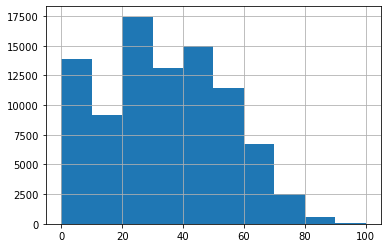

In [10]:
df['popularity'].hist();

In [11]:
df['duration_min'] = df['duration_ms']/1000/60

In [12]:
def artist_counter(artist_list):
    num_artists = 1
    
    for artist in artist_list:
        for char in artist:
            if char == ';':
                num_artists += 1
            
    return num_artists

df['num_artists'] = df['artists'].map(artist_counter)

In [13]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,num_artists
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,3.844433,1
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2.493500,1
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,3.513767,2
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,3.365550,1
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,3.314217,1


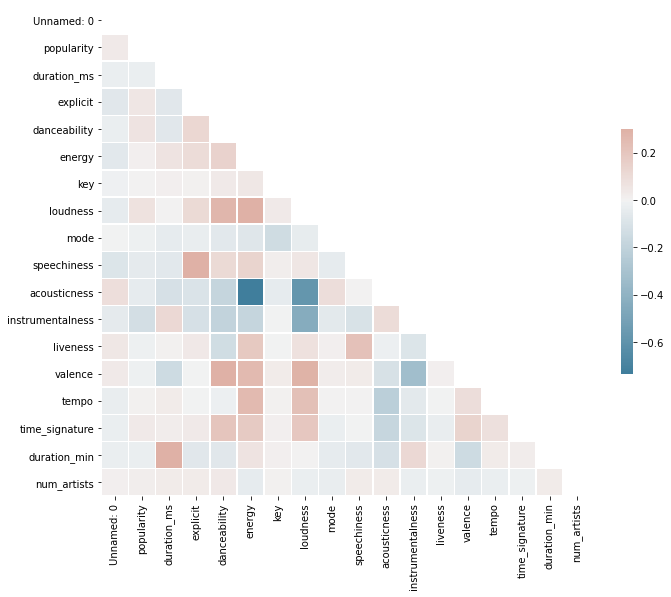

In [14]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [15]:
df_popularity = df.groupby(['popularity']).mean()

In [16]:
df_popularity

,Unnamed: 0,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min,num_artists
popularity,,,,,,,,,,,,,,,,,
0,51454.073886,214169.472954,0.081613,0.556406,0.579786,5.246957,-8.906414,0.661797,0.074320,0.388018,0.125943,0.189723,0.483394,118.491438,3.871494,3.569491,1.436541
1,48087.556682,224094.410138,0.103226,0.577700,0.636542,5.430415,-7.758772,0.647005,0.075460,0.292234,0.090142,0.180340,0.504893,122.228559,3.886636,3.734907,1.449770
2,49882.119192,217794.854545,0.105051,0.607963,0.636177,5.410101,-7.621048,0.577778,0.082767,0.302040,0.113369,0.178070,0.519068,122.485309,3.907071,3.629914,1.561616
3,48739.146179,218755.392027,0.112957,0.597066,0.603550,5.611296,-8.278156,0.558140,0.087367,0.327802,0.173155,0.183585,0.493434,119.868369,3.837209,3.645923,1.601329
4,42961.398268,257754.857143,0.116883,0.613095,0.631953,5.285714,-8.826104,0.562771,0.084507,0.262958,0.279960,0.177065,0.484700,123.218844,3.883117,4.295914,1.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,55519.666667,182053.000000,0.333333,0.746000,0.654000,5.333333,-6.751000,0.333333,0.047267,0.095700,0.000254,0.074500,0.456333,118.344333,4.000000,3.034217,1.000000
97,67358.500000,211141.500000,0.500000,0.780500,0.713500,3.000000,-5.151500,0.000000,0.167350,0.094700,0.000159,0.109650,0.306000,99.338500,4.000000,3.519025,1.500000
98,43682.000000,168937.500000,0.500000,0.698000,0.822000,7.000000,-4.501000,0.000000,0.035350,0.293415,0.000005,0.294500,0.577000,126.510000,4.000000,2.815625,1.500000


In [17]:
graphs = ['explicit', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
         'liveness', 'valence', 'tempo', 'time_signature', 'duration_min', 'num_artists']

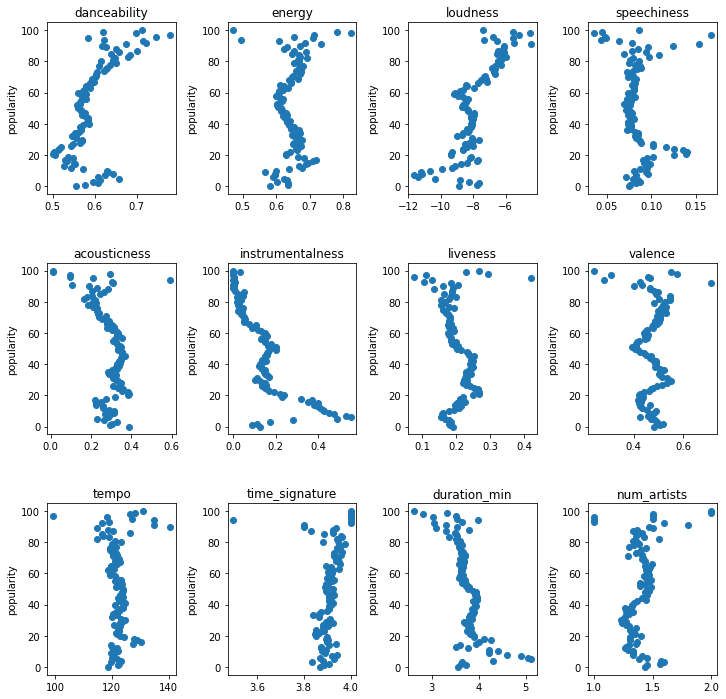

In [18]:
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(hspace=.4, wspace=.4)
for i in range(1, len(graphs)):
    ax = fig.add_subplot(3, 4, i)
    ax.scatter(df_popularity[graphs[i]], df_popularity.index)
    ax.set_title(graphs[i])
    ax.set(ylabel='popularity')

In [19]:
to_drop = ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'duration_ms']

df.drop(to_drop, axis=1, inplace=True)

In [20]:
df.head()

,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,num_artists
0,73,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,3.844433,1
1,55,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2.493500,1
2,57,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,3.513767,2
3,71,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,3.365550,1
4,82,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,3.314217,1


In [21]:
chords = {
    0: 'C',
    1: 'C#',
    2: 'D',
    3: 'D#',
    4: 'E',
    5: 'F',
    6: 'F#',
    7: 'G',
    8: 'G#',
    9: 'A',
    10: 'A#',
    11: 'B'
}

df['key'].replace(chords, inplace=True)

In [22]:
df['key'].value_counts()

G     10550
C     10352
D      9327
A      8998
C#     8576
F      7308
E      7133
B      7129
F#     6139
A#     5889
G#     5570
D#     2769
Name: key, dtype: int64

In [23]:
cat_df = df[['key', 'track_genre']]

In [24]:
ohe = OneHotEncoder()

ohe = OneHotEncoder(sparse=False, handle_unknown='error', drop='first')

genre = pd.DataFrame(ohe.fit_transform(cat_df), \
                               columns=ohe.get_feature_names(cat_df.columns) ,index=cat_df.index)

In [25]:
genre

,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
113996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
113997,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
113998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
df_joined = df.join(genre)

In [27]:
df_joined.head()

,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,73,False,0.676,0.4610,C#,-6.746,0,0.1430,0.0322,0.000001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55,False,0.420,0.1660,C#,-17.235,1,0.0763,0.9240,0.000006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,57,False,0.438,0.3590,C,-9.734,1,0.0557,0.2100,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,71,False,0.266,0.0596,C,-18.515,1,0.0363,0.9050,0.000071,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,82,False,0.618,0.4430,D,-9.681,1,0.0526,0.4690,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df_joined.drop(['key', 'track_genre'], axis=1, inplace=True)

In [29]:
X = df_joined.drop('popularity', axis=1)
y = df_joined['popularity']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler()

In [35]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
pca = PCA()
pca.fit(X_train_scaled)
len(pca.components_)

137

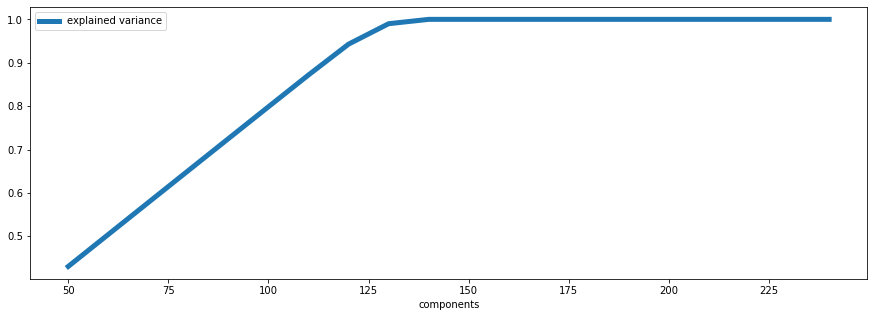

In [43]:
comps = np.arange(50, 250, 10)
exp_var = []

for comp in comps:
    exp_var.append(sum(pca.explained_variance_ratio_[0:comp]))
    
pca_exp_var = pd.concat([pd.Series(comps, name='components'), 
                         pd.Series(exp_var, name='explained variance')], axis=1)

pca_exp_var.set_index('components', inplace=True)

pca_exp_var.plot(kind='line', linewidth=5, figsize=(15, 5));

In [60]:
feature_union = FeatureUnion([
    ('pca', PCA()),
    ('kbest', SelectKBest())
])

prediction_model = Pipeline([
    ('feature_union', feature_union),
    ('rf', RandomForestRegressor(n_estimators=125))
])

In [62]:
rf_model = prediction_model.fit(X_train_scaled, y_train)

In [65]:
rf_model.score(X_train_scaled, y_train)

0.9069421538970124

In [66]:
rf_model.score(X_test_scaled, y_test)

0.4494287624221621

In [76]:
rffe = rf_model.named_steps['rf'].feature_importances_

In [79]:
len(rffe)

147

In [87]:
rffe.sort()

In [88]:
rffe

array([6.06406150e-09, 1.26291496e-08, 1.06326535e-07, 1.49773618e-07,
       1.55680025e-07, 1.59710464e-07, 2.01563488e-07, 4.59031980e-07,
       8.41263057e-07, 2.87768608e-03, 2.92957553e-03, 2.96852701e-03,
       3.00181393e-03, 3.11212424e-03, 3.13028916e-03, 3.17052762e-03,
       3.22700568e-03, 3.41307369e-03, 3.51461923e-03, 3.53964660e-03,
       3.62746998e-03, 3.62803185e-03, 3.63981700e-03, 3.64567360e-03,
       3.68010133e-03, 3.70006717e-03, 3.73712379e-03, 3.74617963e-03,
       3.76266158e-03, 3.76473383e-03, 3.81132875e-03, 3.84979686e-03,
       3.89958637e-03, 3.90349007e-03, 3.92593883e-03, 3.92805247e-03,
       3.94774622e-03, 3.96567027e-03, 3.97729566e-03, 3.99981213e-03,
       4.00573695e-03, 4.02751460e-03, 4.04052165e-03, 4.04482356e-03,
       4.06604426e-03, 4.09015442e-03, 4.11439564e-03, 4.13035811e-03,
       4.21655547e-03, 4.23031905e-03, 4.27676918e-03, 4.31501342e-03,
       4.32170433e-03, 4.39740020e-03, 4.41108141e-03, 4.43188297e-03,
      

In [91]:
X_train.columns

Index(['explicit', 'danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence',
       ...
       'track_genre_spanish', 'track_genre_study', 'track_genre_swedish',
       'track_genre_synth-pop', 'track_genre_tango', 'track_genre_techno',
       'track_genre_trance', 'track_genre_trip-hop', 'track_genre_turkish',
       'track_genre_world-music'],
      dtype='object', length=137)

In [93]:
X_train_scaled.shape

(60125, 137)